# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [2]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [3]:
df_num = df.select_dtypes(include=np.number)
df_num.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



<AxesSubplot:xlabel='Credit_History', ylabel='count'>

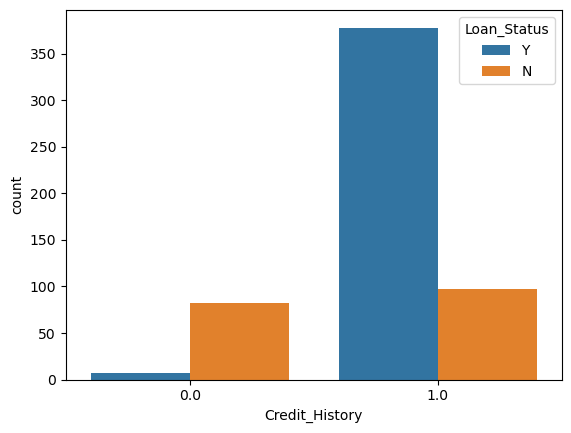

In [4]:
sns.countplot(data = df, x = "Credit_History", hue = "Loan_Status")
# Applicants with a credit history get approved for more loans

<AxesSubplot:ylabel='Count'>

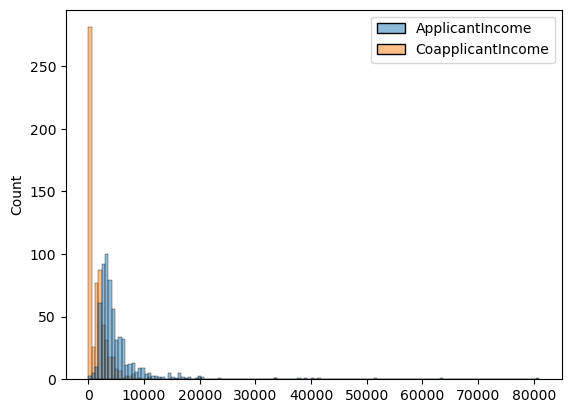

In [5]:
sns.histplot(data = df.loc[:,['ApplicantIncome','CoapplicantIncome']])

# Both the Applicant and Co applicant income seem to be right skewed, tells us that the mean is being affected by potential outliers

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [6]:
df_cat = df.select_dtypes(exclude=np.number)
df_cat.nunique()

Loan_ID          614
Gender             2
Married            2
Dependents         4
Education          2
Self_Employed      2
Property_Area      3
Loan_Status        2
dtype: int64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

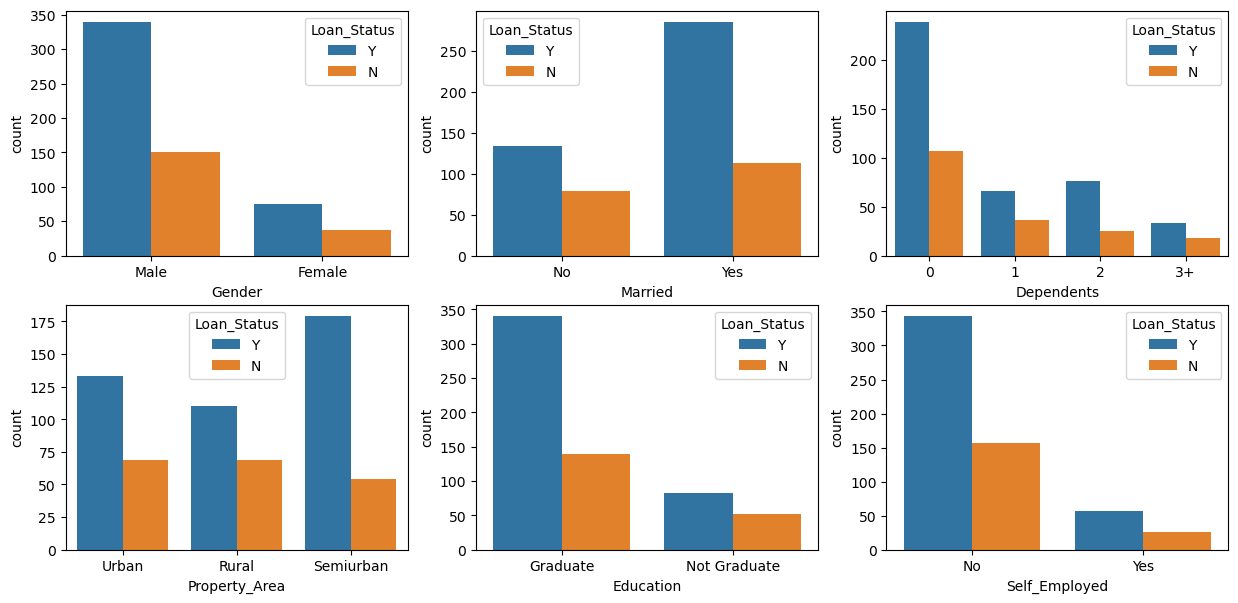

In [7]:
fig, axs = plt.subplots(2,3, figsize=(15,7))

sns.countplot(data=df_cat, x="Gender", ax=axs[0, 0], hue = 'Loan_Status')
sns.countplot(data=df_cat, x="Married",  ax=axs[0, 1], hue = 'Loan_Status')
sns.countplot(data=df_cat, x="Property_Area", ax=axs[1, 0], hue = 'Loan_Status')
sns.countplot(data=df_cat, x="Education", ax=axs[1, 1], hue = 'Loan_Status')
sns.countplot(data=df_cat, x="Dependents", ax=axs[0,2], hue = 'Loan_Status')
sns.countplot(data=df_cat, x="Self_Employed", ax=axs[1,2], hue = 'Loan_Status')

##### Individuals who are married, not self employed and college educated seem to have a higher ratio of approved loans when compared to others

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



<AxesSubplot:ylabel='Count'>

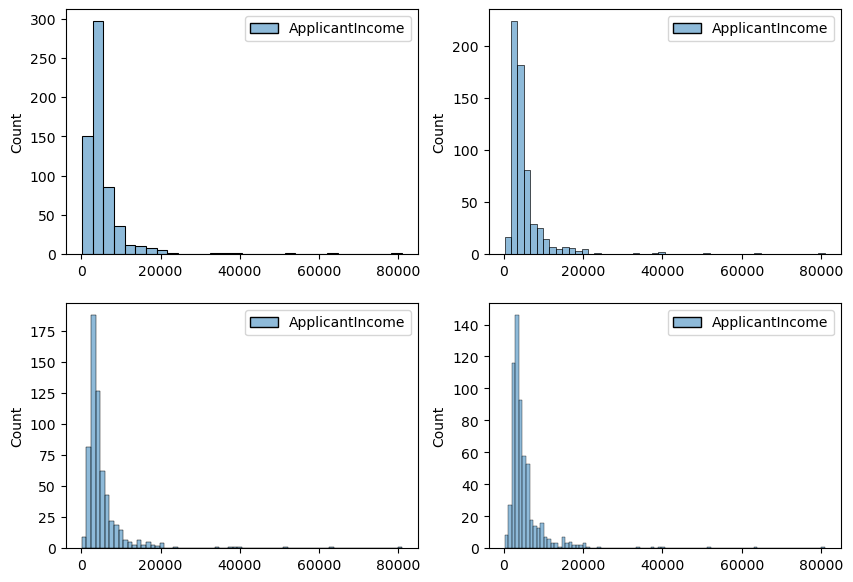

In [8]:
fig, axs = plt.subplots(2,2, figsize=(10,7))
sns.histplot(data = df.loc[:,['ApplicantIncome']], bins = 30, ax=axs[0, 0])
sns.histplot(data = df.loc[:,['ApplicantIncome']], bins = 50, ax=axs[0, 1])
sns.histplot(data = df.loc[:,['ApplicantIncome']], bins = 70, ax=axs[1, 0])
sns.histplot(data = df.loc[:,['ApplicantIncome']], bins = 90, ax=axs[1, 1])

##### Applicant Income seem to have soem extreme values but most lie between 0 - 20000 range


Look at box plots to understand the distributions. 

In [9]:
df_num_melted = pd.melt(df_num.loc[:,['ApplicantIncome', 'CoapplicantIncome','LoanAmount']])

<AxesSubplot:xlabel='variable', ylabel='value'>

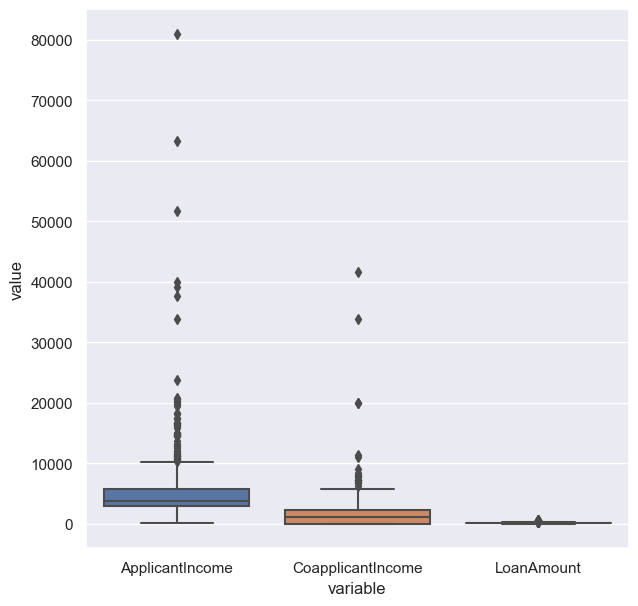

In [10]:
sns.set(rc={'figure.figsize':(7,7)})
sns.boxplot(x='variable', y='value', data = df_num_melted)

##### Both Applicant and Coapplicant Income seem to have some outliers, we need to plot Loan Amount in its own axis to study it more carefulle

Look at the distribution of income segregated  by `Education`

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Education'>

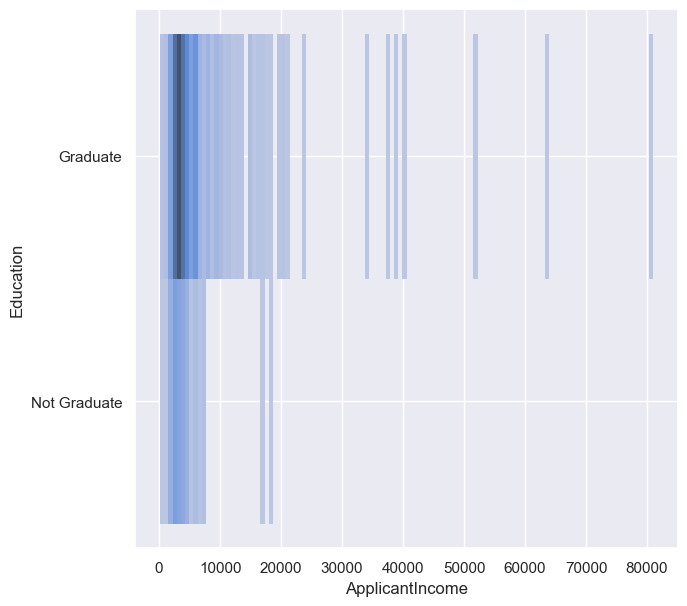

In [11]:
sns.histplot(data = df, x='ApplicantIncome', y='Education')

Look at the histogram and boxplot of LoanAmount

<AxesSubplot:>

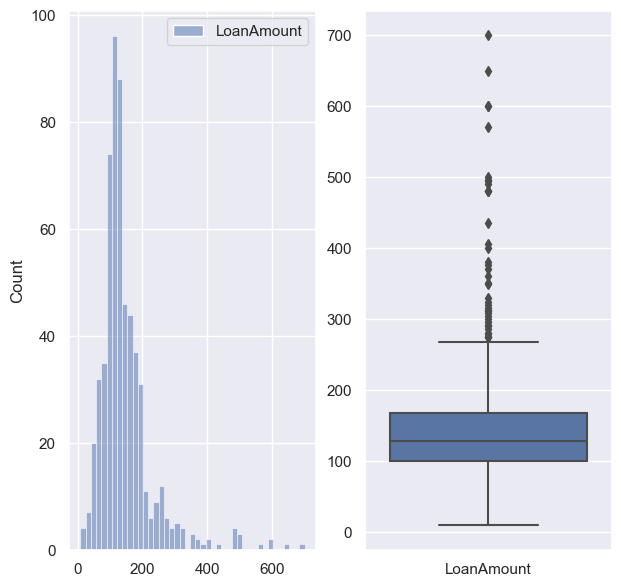

In [12]:
fig, axs = plt.subplots(1,2, figsize=(7,7))

sns.histplot(data = df.loc[:,['LoanAmount']], ax=axs[0])
sns.boxplot(data = df.loc[:,['LoanAmount']], ax = axs[1])

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

In [13]:
outlier_vars = df_num.columns[[0,1,2]]
for column in outlier_vars:
# finds and prints the number of outliers in each numericla column
    lower_quartile = df_num[column].quantile(0.25)
    upper_quartile = df_num[column].quantile(0.75)
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr * 1.5
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended

    outliers = df_num[(df_num[column] < min_border) |     (df_num[column] > max_border)].index
    print(f"{len(outliers)} outliers detected in column {column}")


50 outliers detected in column ApplicantIncome
18 outliers detected in column CoapplicantIncome
39 outliers detected in column LoanAmount


### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [14]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
df.Loan_Status.replace({'Y':1, 'N':0},inplace=True)
table_marr = df.pivot_table(values=['Loan_Status'],#'LoanAmount','Loan_Status'], 
                       index='Education',
                       columns = 'Married',
                       aggfunc={#'ApplicantIncome': np.mean
                                #'LoanAmount': np.mean,
                               'Loan_Status': np.sum
                               })

table_marr

Loan_Status     
Married               No  Yes
Education                    
Graduate             106  231
Not Graduate          28   54

<AxesSubplot:xlabel='Education'>

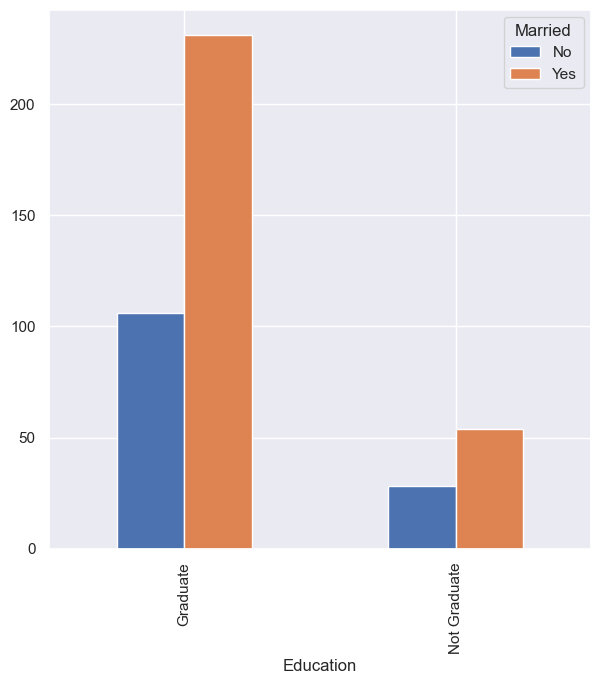

In [16]:
table_marr.plot(kind='bar', y='Loan_Status')

#### The sampling of each group might not be equal but in general it seels like Married Graduates get loans approved more often

In [17]:
table_emp = df.pivot_table(values=['ApplicantIncome','LoanAmount','Loan_Status'], 
                       index=['Self_Employed','Married'], 
                       aggfunc={'ApplicantIncome': np.mean,
                                'LoanAmount': np.mean,
                                'Loan_Status': np.sum})
table_emp

ApplicantIncome  LoanAmount  Loan_Status
Self_Employed Married                                          
No            No           4506.660819  121.186747          107
              Yes          5323.969325  152.509554          233
Yes           No           8015.785714  160.296296           17
              Yes          7051.574074  178.076923           39

<AxesSubplot:xlabel='Married'>

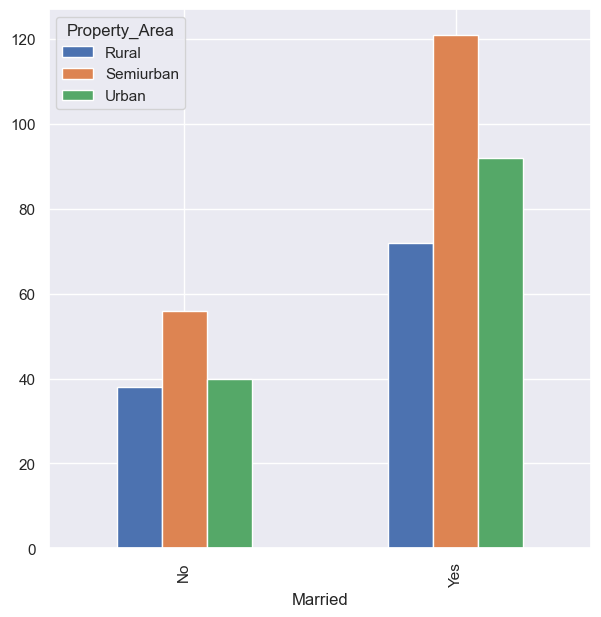

In [18]:
table_property = df.pivot_table(values='Loan_Status', 
                                index='Married',
                                columns='Property_Area', 
                                aggfunc={'Loan_Status': np.sum})
table_property.plot(kind='bar')

##### It looks like Married applicants get loans for semiurban propertys approved more often

In [19]:
table_term = df.pivot_table(values=['ApplicantIncome','Loan_Amount_Term','Loan_Status'], 
                       index=['Property_Area'], 
                       aggfunc={'ApplicantIncome': np.mean,
                                'Loan_Amount_Term': np.mean,
                                'Loan_Status': np.sum})
table_term

,ApplicantIncome,Loan_Amount_Term,Loan_Status
Property_Area,,,
Rural,5554.083799,345.531429,110
Semiurban,5292.261803,347.113043,179
Urban,5398.247525,332.800000,133


## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [20]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
df.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [22]:
# first we will save and drop the target variable
df_train, y_train = df.drop(columns='Loan_Status'), df['Loan_Status'].values

In [23]:
# we will impute null values in LoanAmount based on the average Loan amounts for each Property_Area
df_train['LoanAmount'] = df_train.groupby('Property_Area')['LoanAmount'].transform(lambda x: x.fillna(x.mean()))

In [24]:
df_train.LoanAmount.isnull().sum()

0

#### Rest of the values we will just find the mean or mode of from the entire column using simple imputer

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [25]:
from sklearn.preprocessing import FunctionTransformer

def log_transform(X):
    X_log = np.log(X)
    return X_log

# save this variable for our pipeline
log_transform_object = FunctionTransformer(log_transform)

<AxesSubplot:ylabel='Count'>

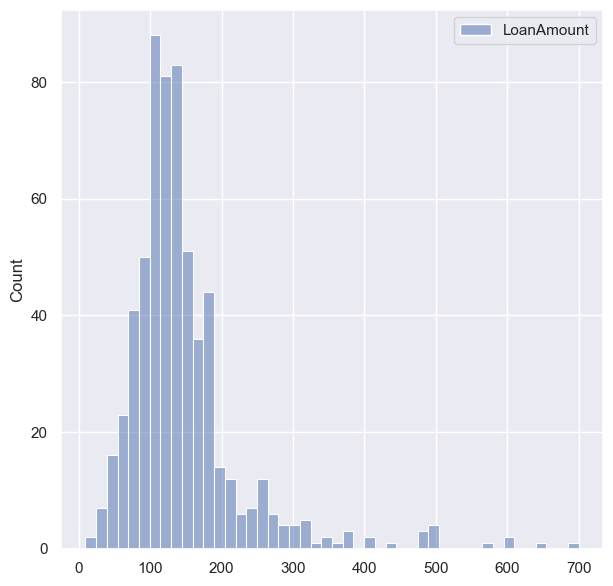

In [26]:
sns.histplot(data=df_train.loc[:,['LoanAmount']])

<AxesSubplot:ylabel='Count'>

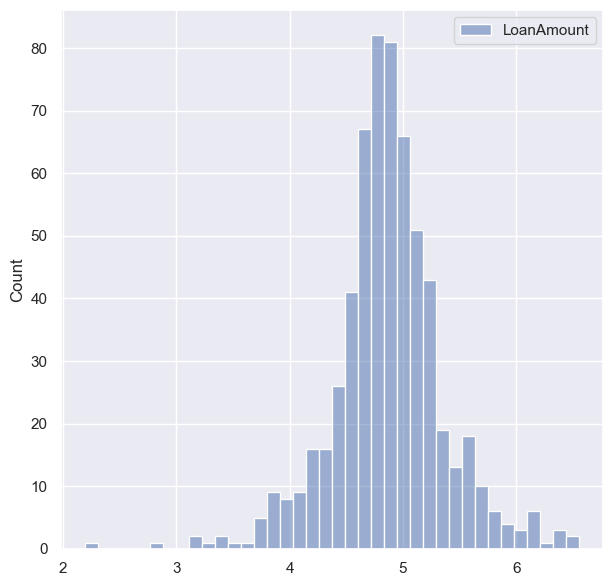

In [27]:
sns.histplot(data=log_transform(df_train.loc[:,['LoanAmount']]))

Combine both incomes as total income and take a log transformation of the same.

In [28]:
def total_income(X, Y):
    X_total = X + Y
    return X_total


<AxesSubplot:ylabel='Count'>

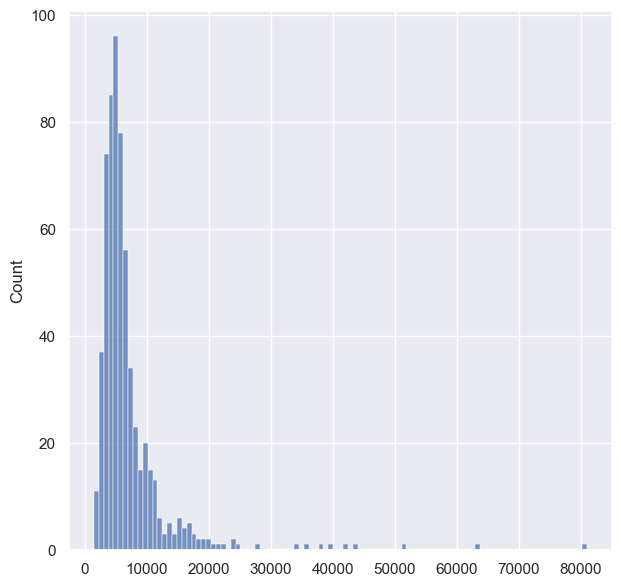

In [29]:
sns.histplot(data=total_income(df['ApplicantIncome'], df['CoapplicantIncome']))

<AxesSubplot:ylabel='Count'>

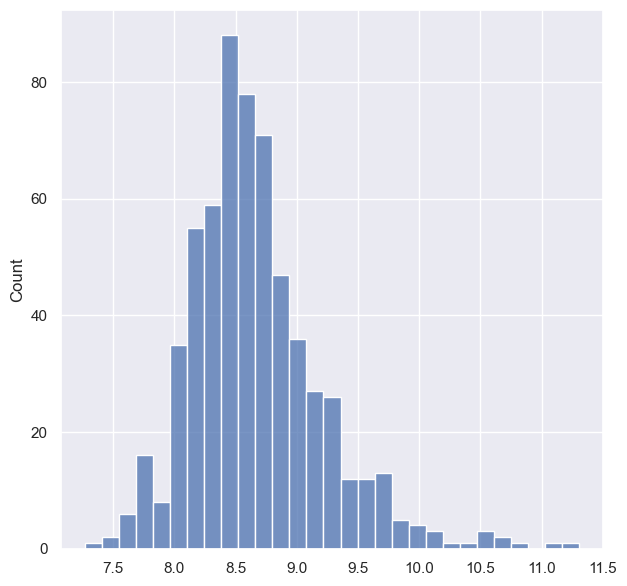

In [30]:
sns.histplot(data=log_transform(total_income(df['ApplicantIncome'], df['CoapplicantIncome'])))

## 4. Building a Predictive Model

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [32]:
df_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [33]:
df_train.drop('Loan_ID',axis=1, inplace=True)

In [34]:
log_Loan = ColumnTransformer([('log_loan', log_transform_object, ['LoanAmount'])],
                             remainder='passthrough')

numeric_transform = Pipeline([('impute_mean', SimpleImputer(strategy='mean')),
                              ('scaling', StandardScaler())])
categorical_transform = Pipeline([('impute_mode', SimpleImputer(strategy = 'most_frequent')),
                                  ('one-hot-encode', OneHotEncoder(sparse=False))])

preprocessing = ColumnTransformer([#('Log_transform', log_transform_object, ['LoanAmount']),
                                   ('numeric', numeric_transform, ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']), 
                                   ('categorical', categorical_transform, ['Gender','Married','Dependents','Education','Self_Employed','Property_Area'])])
                                   
                                   


##### I couldnt quite figure out how and where to properly add the log transformformation without raising an error

In [35]:
pd.DataFrame(preprocessing.fit_transform(df_train)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.072991,-0.554487,-0.049867,0.279851,0.45164,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.134412,-0.038732,-0.218957,0.279851,0.45164,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.393747,-0.554487,-0.957290,0.279851,0.45164,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.462062,0.251980,-0.314226,0.279851,0.45164,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.097728,-0.554487,-0.064145,0.279851,0.45164,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [36]:
pipeline_basic = Pipeline(steps=[('preprocessing', preprocessing),
                                   ('model', LogisticRegression())])

pipeline_basic.fit(df_train, y_train)
best_acc = pipeline_basic.score(df_train, y_train)
print(best_acc)

0.8110749185667753


In [37]:
from sklearn import set_config
set_config(display='diagram')

pipeline_basic

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot-encode',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Property_Area'])])),
                ('model', LogisticRegression())])

#### the more complex preprocessing steps which include custom class creation and using function transformation kept giving me error, so i will ignore them for now

Try paramater grid search to improve the results

In [38]:
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [39]:
feature_union = FeatureUnion([('pca', PCA()), 
                              ('select_best', SelectKBest())])
pipeline_final = Pipeline(steps=[('preprocessing', preprocessing),
                                 ('features', feature_union),
                                 ('model', RandomForestClassifier(max_depth=15))])

param_grid = {'model': [LogisticRegression(), SVC(), RandomForestClassifier()],
              'features__pca__n_components': [8,9,10],
              'features__select_best__k': [8,9,10]}

grid_search = GridSearchCV(pipeline_final, param_grid, cv=5 ,n_jobs = -1, verbose=10, refit=True) 

grid_search.fit(df_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute_mean',
                                                                                          SimpleImputer()),
                                                                                         ('scaling',
                                                                                          StandardScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term',
                                                                          'Credit_History']),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('impute_mode',
                                                                                          SimpleImputer(strategy='most_fr...
                                                                          'Education',
                                                                          'Self_Employed',
                                                                          'Property_Area'])])),
                                       ('features',
                                        FeatureUnion(transformer_list=[('pca',
                                                                        PCA()),
                                                                       ('select_best',
                                                                        SelectKBest())])),
                                       ('model',
                                        RandomForestClassifier(max_depth=15))]),
             n_jobs=-1,
             param_grid={'features__pca__n_components': [8, 9, 10],
                         'features__select_best__k': [8, 9, 10],
                         'model': [LogisticRegression(), SVC(),
                                   RandomForestClassifier()]},
             verbose=10)

In [40]:
print(grid_search.best_params_)


{'features__pca__n_components': 10, 'features__select_best__k': 10, 'model': LogisticRegression()}


In [41]:
best_acc_final = grid_search.score(df_train, y_train)
best_acc_final

0.8127035830618893

##### LogisticRegression kept giving me the best scores, therefore I will go ahead and use it for deployment

##### I would like to come back and try other ensemble models with more hyperparameters to tune but for now I will stick with LogisticRegression

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

##### Used pipelines in all my steps as shown above

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [42]:
import pickle

In [43]:
pickle.dump( grid_search, open( "model.p", "wb" ) )

In [44]:
# json_data to feed into our deployed model
json_data = {'Gender': 'Male',
             'Married': 'No',
             'Dependents': '0',
             'Education': 'Graduate',
             'Self_Employed': 'No',
             'ApplicantIncome': 5849,
             'CoapplicantIncome': 0.0,
             'LoanAmount': 360.0,
             'Loan_Amount_Term': 360.0,
             'Credit_History': 1.0,
             'Property_Area': 'Urban'}

In [55]:
import requests
URL = "http://192.168.0.19:5000/scoring" #base url local host
URL_cloud = "http://ec2-3-135-215-11.us-east-2.compute.amazonaws.com:5000/scoring" 

r=requests.post(url = URL_cloud, json = json_data)

In [56]:
print(r.json())

[1]


#### There is also a test.py to run in the command line that prints out the prediction from the model